In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')

# Display basic information
print("Training dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)
print("Gender submission shape:", gender_submission.shape)

print("\nTraining dataset info:")
print(train_df.info())
print("\nMissing values in training data:")
print(train_df.isnull().sum())

Training dataset shape: (891, 12)
Test dataset shape: (418, 11)
Gender submission shape: (418, 2)

Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex    

# New section

In [6]:

df_clean = train_df.copy()

df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
df_clean['Cabin'].fillna('Unknown', inplace=True)

df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)

title_mapping = {'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master'}
df_clean['Title'] = df_clean['Title'].map(title_mapping).fillna('Other')

df_clean['AgeGroup'] = pd.cut(df_clean['Age'],
                             bins=[0, 12, 18, 35, 60, 100],
                             labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

df_clean['FareGroup'] = pd.qcut(df_clean['Fare'], 4,
                               labels=['Low', 'Medium', 'High', 'Very High'])

print("Cleaned dataset shape:", df_clean.shape)
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Cleaned dataset shape: (891, 17)

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
AgeGroup       0
FareGroup      0
dtype: int64


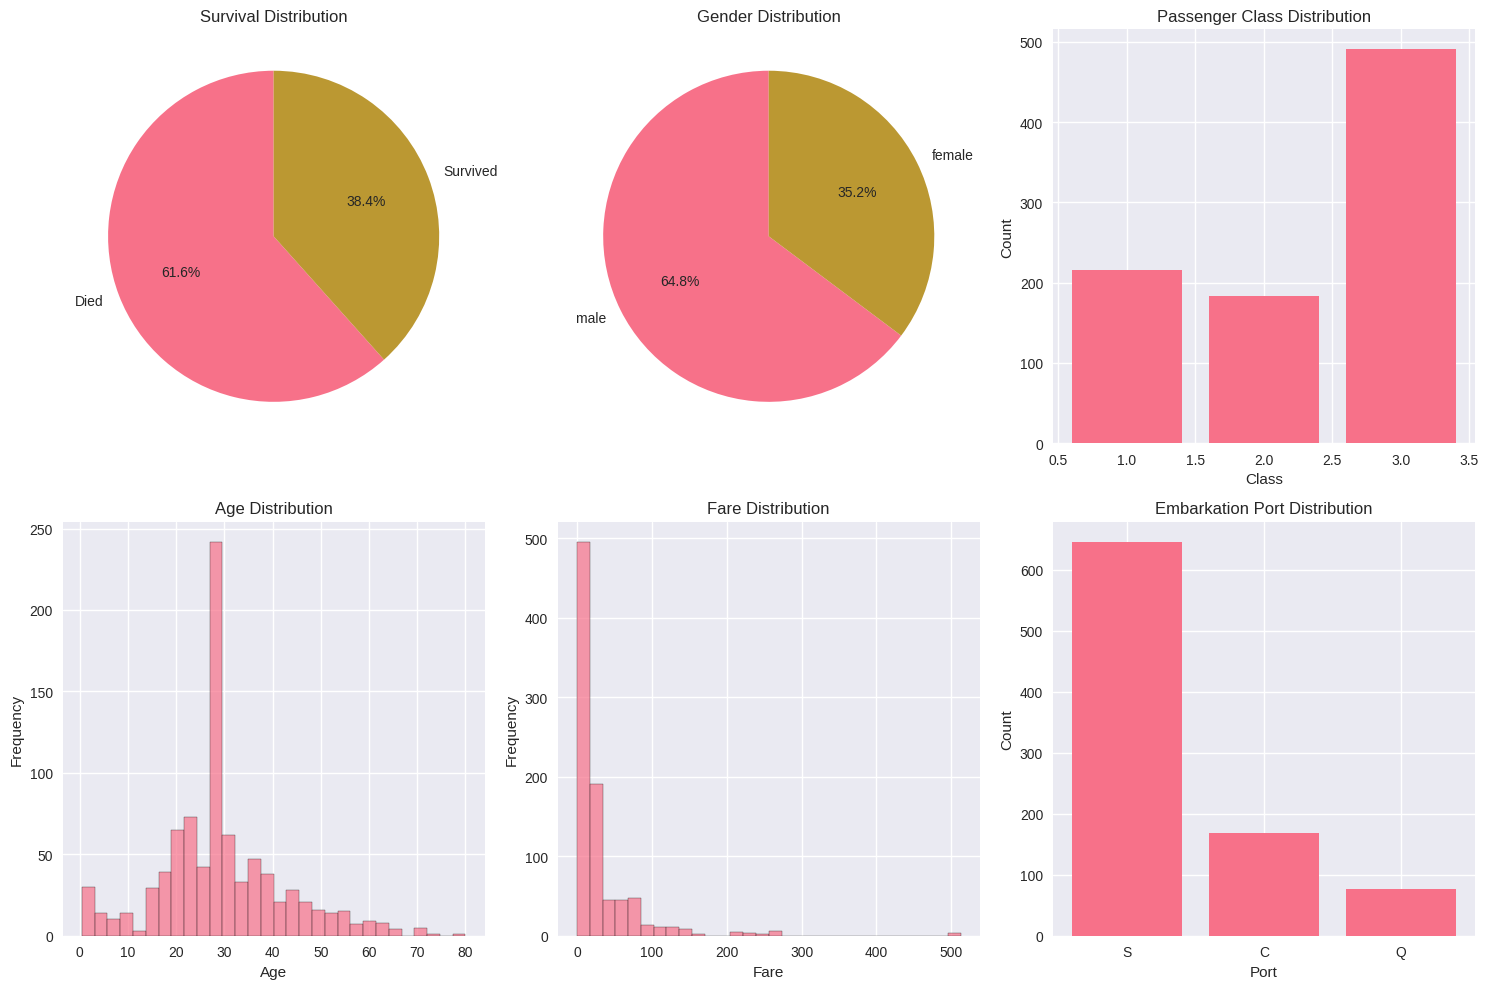

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

survival_counts = df_clean['Survived'].value_counts()
axes[0,0].pie(survival_counts, labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Survival Distribution')

gender_counts = df_clean['Sex'].value_counts()
axes[0,1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Gender Distribution')

class_counts = df_clean['Pclass'].value_counts().sort_index()
axes[0,2].bar(class_counts.index, class_counts.values)
axes[0,2].set_title('Passenger Class Distribution')
axes[0,2].set_xlabel('Class')
axes[0,2].set_ylabel('Count')

axes[1,0].hist(df_clean['Age'], bins=30, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

axes[1,1].hist(df_clean['Fare'], bins=30, edgecolor='black', alpha=0.7)
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')

embarked_counts = df_clean['Embarked'].value_counts()
axes[1,2].bar(embarked_counts.index, embarked_counts.values)
axes[1,2].set_title('Embarkation Port Distribution')
axes[1,2].set_xlabel('Port')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

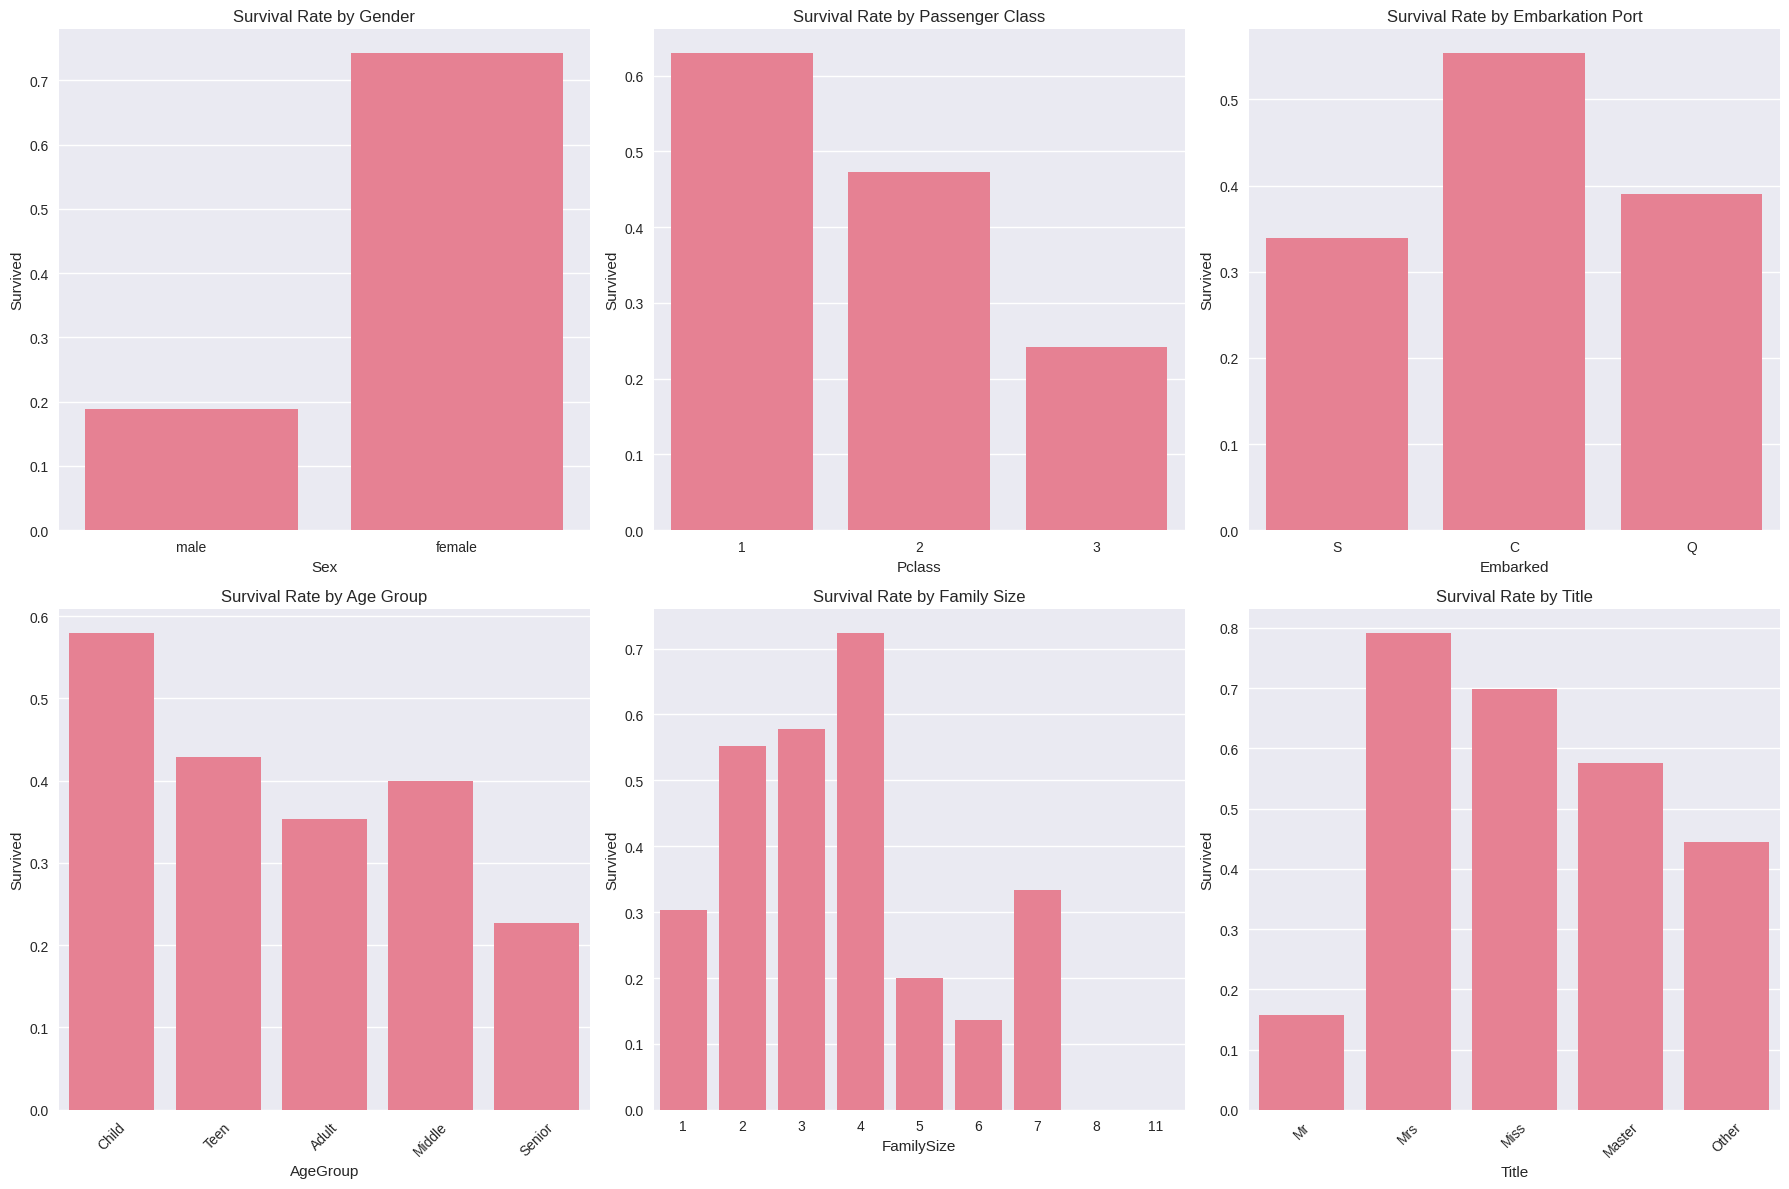

In [8]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(x='Sex', y='Survived', data=df_clean, ax=axes[0,0], ci=None)
axes[0,0].set_title('Survival Rate by Gender')

sns.barplot(x='Pclass', y='Survived', data=df_clean, ax=axes[0,1], ci=None)
axes[0,1].set_title('Survival Rate by Passenger Class')

sns.barplot(x='Embarked', y='Survived', data=df_clean, ax=axes[0,2], ci=None)
axes[0,2].set_title('Survival Rate by Embarkation Port')

sns.barplot(x='AgeGroup', y='Survived', data=df_clean, ax=axes[1,0], ci=None)
axes[1,0].set_title('Survival Rate by Age Group')
axes[1,0].tick_params(axis='x', rotation=45)

sns.barplot(x='FamilySize', y='Survived', data=df_clean, ax=axes[1,1], ci=None)
axes[1,1].set_title('Survival Rate by Family Size')

sns.barplot(x='Title', y='Survived', data=df_clean, ax=axes[1,2], ci=None)
axes[1,2].set_title('Survival Rate by Title')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

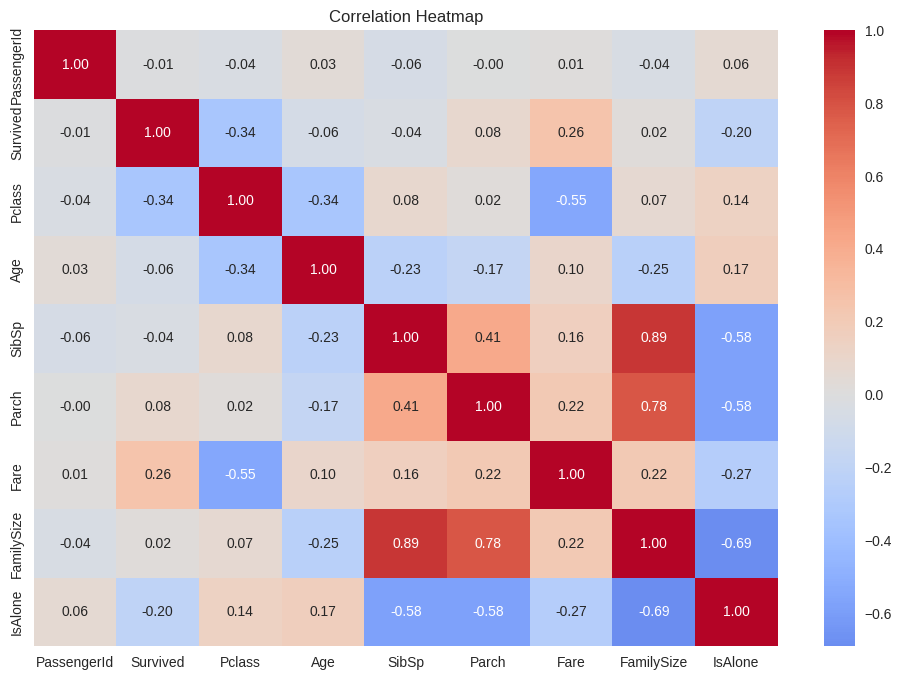

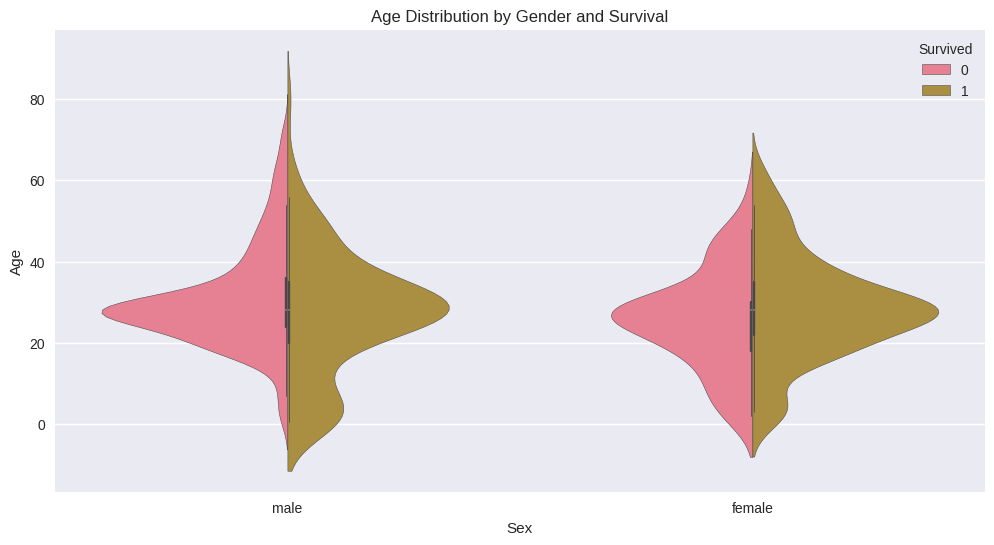

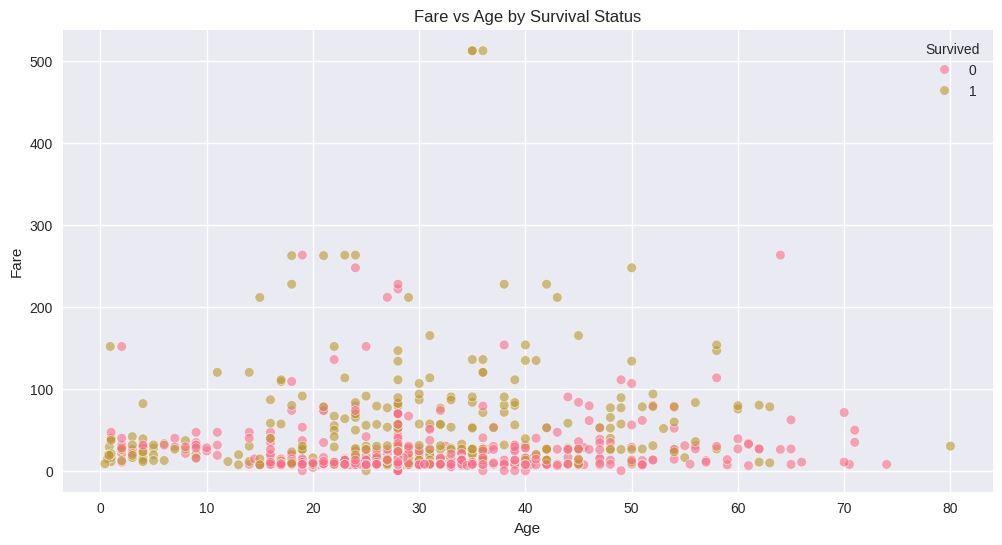

In [9]:
plt.figure(figsize=(12, 8))
numeric_df = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_clean, split=True)
plt.title('Age Distribution by Gender and Survival')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_clean, alpha=0.6)
plt.title('Fare vs Age by Survival Status')
plt.show()

In [10]:

print("Survival by Class and Gender:")
print(pd.crosstab([df_clean['Pclass'], df_clean['Sex']],
                 df_clean['Survived'], normalize='index') * 100)

print("\nSurvival by Age Group and Gender:")
print(pd.crosstab([df_clean['AgeGroup'], df_clean['Sex']],
                 df_clean['Survived'], normalize='index') * 100)

contingency_table = pd.crosstab(df_clean['Survived'], df_clean['Sex'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test for Survival vs Gender: p-value = {p_value:.4f}")

survived_age = df_clean[df_clean['Survived'] == 1]['Age']
died_age = df_clean[df_clean['Survived'] == 0]['Age']
t_stat, p_value = stats.ttest_ind(survived_age, died_age)
print(f"T-test for Age difference: p-value = {p_value:.4f}")

Survival by Class and Gender:
Survived               0          1
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669

Survival by Age Group and Gender:
Survived                 0           1
AgeGroup Sex                          
Child    female  40.625000   59.375000
         male    43.243243   56.756757
Teen     female  25.000000   75.000000
         male    91.176471    8.823529
Adult    female  24.855491   75.144509
         male    83.701657   16.298343
Middle   female  22.857143   77.142857
         male    80.800000   19.200000
Senior   female   0.000000  100.000000
         male    89.473684   10.526316

Chi-square test for Survival vs Gender: p-value = 0.0000
T-test for Age difference: p-value = 0.0528


In [11]:
overall_survival = df_clean['Survived'].mean() * 100
female_survival = df_clean[df_clean['Sex'] == 'female']['Survived'].mean() * 100
male_survival = df_clean[df_clean['Sex'] == 'male']['Survived'].mean() * 100
first_class_survival = df_clean[df_clean['Pclass'] == 1]['Survived'].mean() * 100

print("="*50)
print("KEY INSIGHTS FROM TITANIC DATASET ANALYSIS")
print("="*50)
print(f"Overall Survival Rate: {overall_survival:.1f}%")
print(f"Female Survival Rate: {female_survival:.1f}%")
print(f"Male Survival Rate: {male_survival:.1f}%")
print(f"First Class Survival Rate: {first_class_survival:.1f}%")
print("\nTop 5 Factors Influencing Survival:")
print("1. Gender (Female advantage)")
print("2. Passenger Class (Higher class advantage)")
print("3. Age (Children and women first policy)")
print("4. Family Size (Moderate family size advantage)")
print("5. Embarkation Port (Port C had highest survival)")

KEY INSIGHTS FROM TITANIC DATASET ANALYSIS
Overall Survival Rate: 38.4%
Female Survival Rate: 74.2%
Male Survival Rate: 18.9%
First Class Survival Rate: 63.0%

Top 5 Factors Influencing Survival:
1. Gender (Female advantage)
2. Passenger Class (Higher class advantage)
3. Age (Children and women first policy)
4. Family Size (Moderate family size advantage)
5. Embarkation Port (Port C had highest survival)


In [14]:
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Passengers', 'Survivors', 'Non-Survivors',
        'Average Age', 'Average Fare', 'Female Percentage',
        'First Class Percentage', 'Children Percentage',
        'Most Common Embarkation', 'Most Common Title'
    ],
    'Value': [
        len(df_clean),
        df_clean['Survived'].sum(),
        len(df_clean) - df_clean['Survived'].sum(),
        f"{df_clean['Age'].mean():.1f} years",
        f"${df_clean['Fare'].mean():.2f}",
        f"{len(df_clean[df_clean['Sex']=='female'])/len(df_clean)*100:.1f}%",
        f"{len(df_clean[df_clean['Pclass']==1])/len(df_clean)*100:.1f}%",
        f"{len(df_clean[df_clean['Age']<18])/len(df_clean)*100:.1f}%",
        df_clean['Embarked'].mode()[0],
        df_clean['Title'].mode()[0]
    ]
})

print("=" * 50)
print("COMPREHENSIVE SUMMARY REPORT")
print("=" * 50)
display(summary_stats)

print("\n" + "🎯 SURVIVAL PREDICTION FACTORS (Ranked by Importance):")
print("1. Female gender")
print("2. First class ticket")
print("3. Higher fare amount")
print("4. Younger age (especially children)")
print("5. Embarking from Cherbourg (Port C)")
print("6. Traveling with small family (3-4 members)")
print("7. Having a title like 'Mrs' or 'Miss'")

print(f"\n📋 Dataset successfully cleaned and analyzed with {df_clean.shape[0]} passengers and {df_clean.shape[1]} features")

COMPREHENSIVE SUMMARY REPORT


,Metric,Value
0,Total Passengers,891
1,Survivors,342
2,Non-Survivors,549
3,Average Age,29.4 years
4,Average Fare,$32.20
5,Female Percentage,35.2%
6,First Class Percentage,24.2%
7,Children Percentage,12.7%
8,Most Common Embarkation,S
9,Most Common Title,Mr



🎯 SURVIVAL PREDICTION FACTORS (Ranked by Importance):
1. Female gender
2. First class ticket
3. Higher fare amount
4. Younger age (especially children)
5. Embarking from Cherbourg (Port C)
6. Traveling with small family (3-4 members)
7. Having a title like 'Mrs' or 'Miss'

📋 Dataset successfully cleaned and analyzed with 891 passengers and 17 features
